In [1]:
from notebook.auth import passwd

In [5]:
import os, re, pymysql
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
passwd()

Enter password: ········
Verify password: ········


'sha1:7c2541e21d9e:a7a1ffacae7caa995f6a58900c9e022a759d13cb'

In [4]:
total = pd.read_excel("..\mp_total.xlsx", header=2)

In [9]:
total.drop(0)[:4]

,mp_id,line_id,equip_name,equip_cat_id,equip_model,equip_id,mp_name,equip_info_table,equip_fcf_table,cm_results_table,keyp_path,data_path,samp_freq,samp_time,samp_interval,sensor_type
1,MPID001,生产线1,煤立磨减速机1,CATID001,JLP250G,EQPID001,测点1,equip_info_eqpid001,equip_fcf_catid001,resu_MPID001,F:\hechaun\生产线1\煤立磨减速机#1\测点0,F:\hechaun\生产线1\煤立磨减速机#1\测点1,12800,10,1,JLP250G
2,MPID002,生产线1,煤立磨减速机1,CATID001,JLP250G,EQPID001,测点2,equip_info_eqpid001,equip_fcf_catid001,resu_MPID002,F:\hechaun\生产线1\煤立磨减速机#1\测点0,F:\hechaun\生产线1\煤立磨减速机#1\测点2,12800,10,1,JLP250G
3,MPID003,生产线2,煤立磨减速机2,CATID001,JLP250G,EQPID002,测点1,equip_info_eqpid002,equip_fcf_catid002,resu_MPID003,F:\hechaun\生产线2\煤立磨减速机#2\测点0,F:\hechaun\生产线2\煤立磨减速机#2\测点1,12800,10,1,JLP250G
4,MPID004,生产线1,窑主减速机,CATID005,JH800C-SW306-31.5,EQPID003,测点1,equip_info_eqpid003,equip_fcf_catid003,resu_MPID004,NaN,F:\hechaun\生产线1\窑主减速机#1\测点1,12800,10,1,JLP250G


In [14]:
total.drop(0).loc[2]

mp_id                                    MPID002
line_id                                     生产线1
equip_name                               煤立磨减速机1
equip_cat_id                            CATID001
equip_model                              JLP250G
equip_id                                EQPID001
mp_name                                      测点2
equip_info_table             equip_info_eqpid001
equip_fcf_table               equip_fcf_catid001
cm_results_table                    resu_MPID002
keyp_path           F:\hechaun\生产线1\煤立磨减速机#1\测点0
data_path           F:\hechaun\生产线1\煤立磨减速机#1\测点2
samp_freq                                  12800
samp_time                                     10
samp_interval                                  1
sensor_type                              JLP250G
Name: 2, dtype: object

In [51]:
raw_filename = []
new_filename = []

In [54]:
for roots, dirs, files in os.walk(".\hechuan", topdown=True):
    #[raw_filename.append(i) for i in dirs if "#" in i]
    #print (roots, dirs, files)
    for i in dirs:
        index = i.find("#")
        if index!=-1 and i[index-1].isdigit():
            raw_filename.append(i)     
            new_name = i[:index-1]+i[index+1:]+"#"+i[index-1]
            new_filename.append(new_name)
            os.rename(os.path.join(roots, i), os.path.join(roots, new_name))

In [20]:
i = "012#1"
i.find("#")

3

In [57]:
raw_filename,new_filename

(['1#生产线',
  '2#生产线',
  '原料1#立磨减速机',
  '水泥1#球磨减速机',
  '水泥1#辊压机减速机（动辊）',
  '水泥1#辊压机减速机（定辊）',
  '水泥2#球磨减速机',
  '水泥2#辊压机减速机（动辊）',
  '水泥2#辊压机减速机（定辊）',
  '烧成1#煤立磨减速机',
  '烧成1#窑主减速机',
  '原料2#立磨减速机',
  '原料3#立磨减速机',
  '水泥4#球磨减速机',
  '水泥4#辊压机减速机（动辊）',
  '水泥4#辊压机减速机（定辊）',
  '水泥5#球磨减速机',
  '水泥5#辊压机减速机（动辊）',
  '水泥5#辊压机减速机（定辊）',
  '烧成2#煤立磨减速机',
  '烧成2#窑主减速机'],
 ['生产线#1',
  '生产线#2',
  '原料立磨减速机#1',
  '水泥球磨减速机#1',
  '水泥辊压机减速机（动辊）#1',
  '水泥辊压机减速机（定辊）#1',
  '水泥球磨减速机#2',
  '水泥辊压机减速机（动辊）#2',
  '水泥辊压机减速机（定辊）#2',
  '烧成煤立磨减速机#1',
  '烧成窑主减速机#1',
  '原料立磨减速机#2',
  '原料立磨减速机#3',
  '水泥球磨减速机#4',
  '水泥辊压机减速机（动辊）#4',
  '水泥辊压机减速机（定辊）#4',
  '水泥球磨减速机#5',
  '水泥辊压机减速机（动辊）#5',
  '水泥辊压机减速机（定辊）#5',
  '烧成煤立磨减速机#2',
  '烧成窑主减速机#2'])

In [58]:
#filename_orig = []
filename_new = []
for roots, dirs, files in os.walk(".\hechuan", topdown=True):
    #[raw_filename.append(i) for i in dirs if "#" in i]
    #print (roots, dirs, files)
    for i in files:
        #filename_orig.append(i)
        new_name = i
        for j in range(len(raw_filename)):
            if raw_filename[j] in i:
                new_name = i.replace(raw_filename[j], new_filename[j])
        index = new_name.find("_")  
        #new_name = new_name[:index]+"EQPID001_MPID001"+new_name[index:]
        new_name = new_name[:4]+"_"+new_name[4:]
        filename_new.append(new_name) 
        os.rename(os.path.join(roots, i), os.path.join(roots, new_name))

In [72]:
filename_new

['扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201010530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201020530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201030530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201040530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201050530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201060530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201070530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201080530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201090530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201100530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201110530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#1_烧成煤立磨减速机#1_测点1_990rpm_12800Hz_20170201120530.csv',
 '扶风水泥_EQPID001_MPID001_生产线#

In [69]:
for roots, dirs, files in os.walk(".\hechuan\生产线1\烧成煤立磨减速机1\测点1", topdown=True):
    print(roots, dirs, files)
    for i in files:
        if "_EQPID001" in i:
            new_name = i.replace("_EQPID001", "")
            os.rename(os.path.join(roots, i), os.path.join(roots, new_name))
# for roots, dirs, files in os.walk(".\hechuan", topdown=True):
#     for i in files:
#         if "#" in i:
#             new_name = i.replace("#", "")
#             os.rename(os.path.join(roots, i), os.path.join(roots, new_name))

.\hechuan\生产线1\烧成煤立磨减速机1\测点1 ['20170201', '20170202', '20170203', '20170204', '20170205', '20170206', '20170207', '20170208', '20170209', '20170210'] []
.\hechuan\生产线1\烧成煤立磨减速机1\测点1\20170201 [] ['合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201000530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201010530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201020530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201030530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201040530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201050530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201060530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201070530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201080530.csv', '合川水泥_EQPID001_MPID001_生产线1_烧成煤立磨减速机1_测点1_990rpm_12800Hz_20170201090530.csv', '合川水泥_EQPID001_MPID001_生产

In [84]:
keyp = scio.loadmat(r"..\jianxiang.mat")
X = keyp["x"]
Y = keyp["y"]
keypd = np.zeros((1400000, 2))
#nl = os.listdir(r".\hechuan\生产线#1\烧成煤立磨减速机#1\测点0\20170201")
keypd[:1400000, 0] = X[:1400000, 0]
keypd[:1400000, 1] = Y[:1400000, 0]

In [97]:
np.bincount(np.bincount(np.squeeze(Y)))

array([2280,  112,    1, ...,    0,    0,    1], dtype=int64)

In [113]:
keypd = [X, Y]

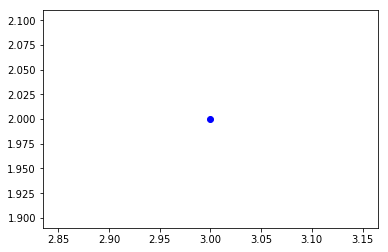

In [164]:
# plt.figure(figsize=(15, 8))
plt.plot(3,2,"bo")
plt.show()

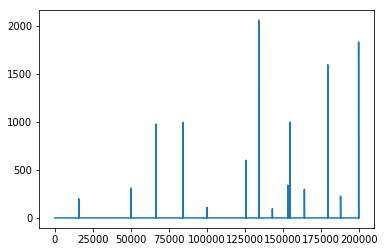

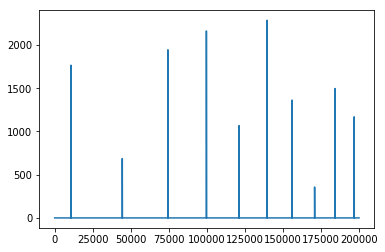

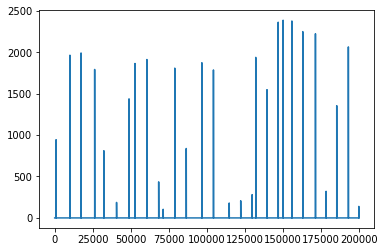

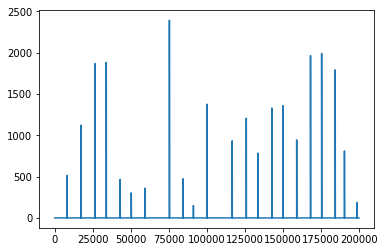

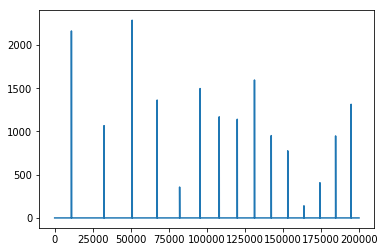

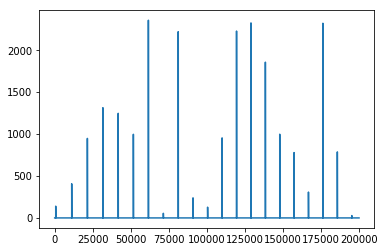

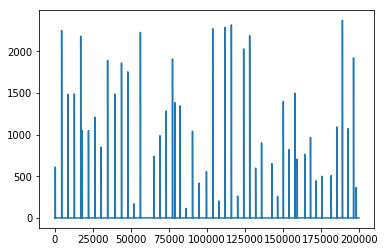

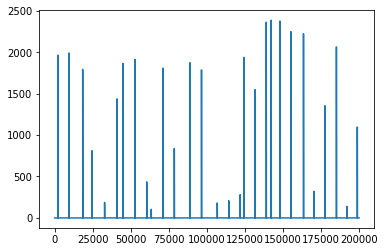

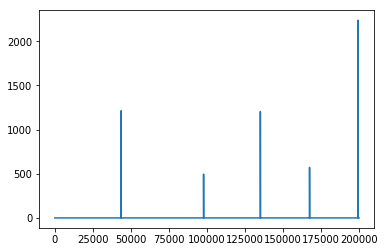

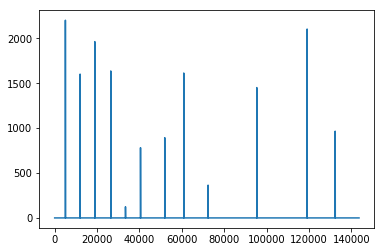

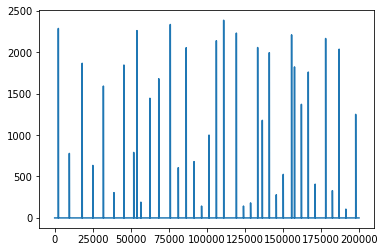

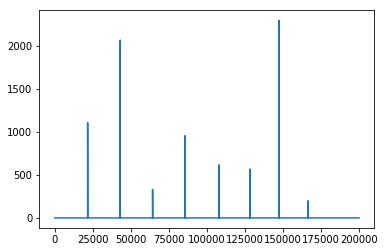

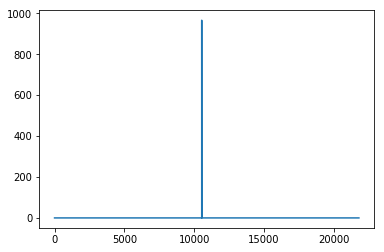

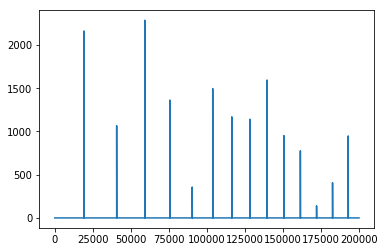

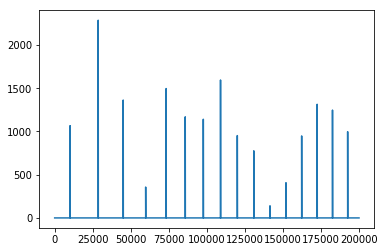

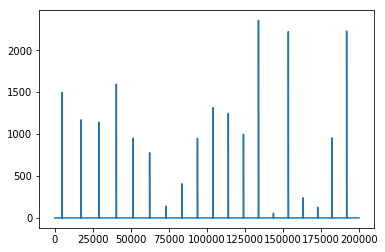

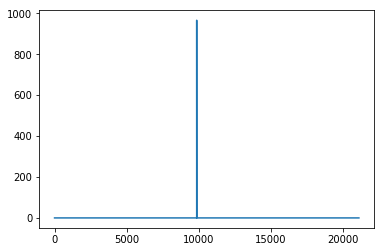

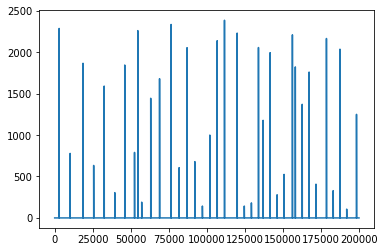

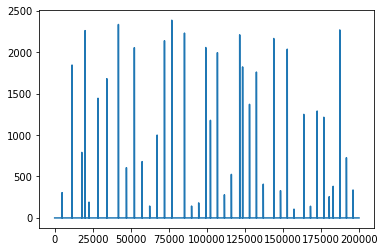

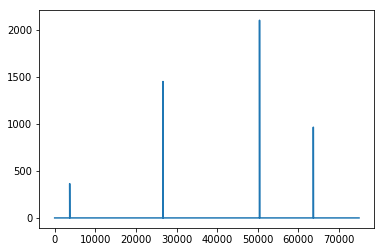

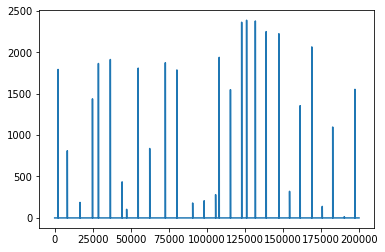

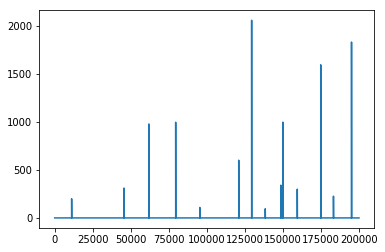

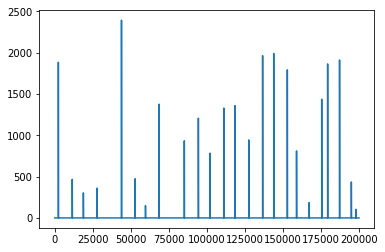

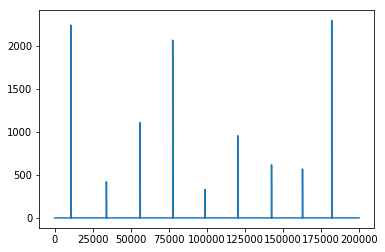

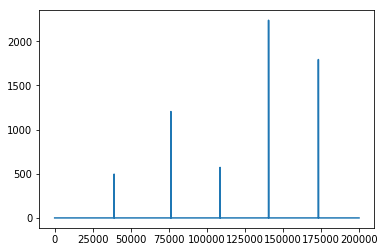

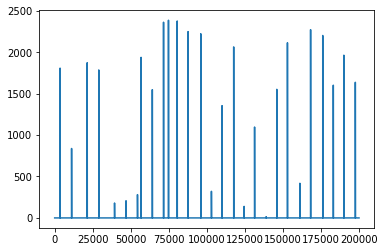

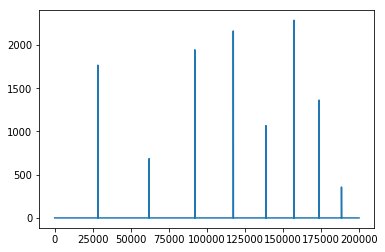

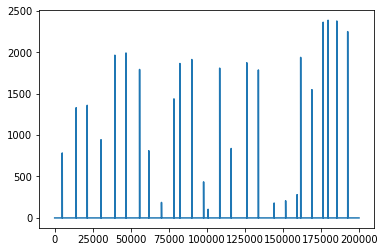

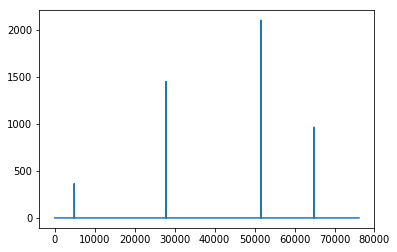

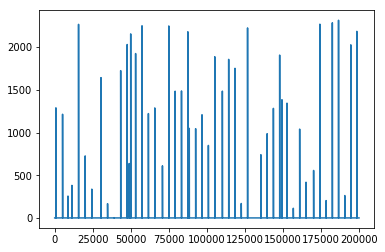

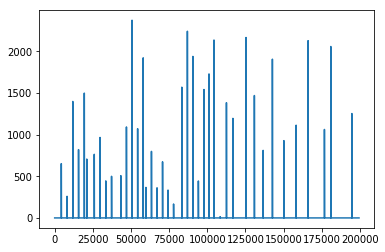

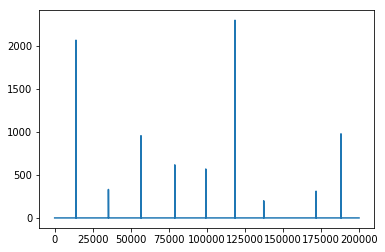

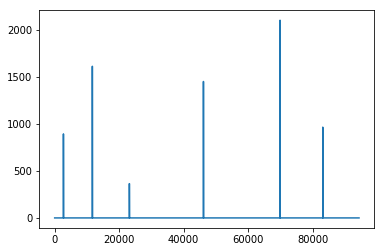

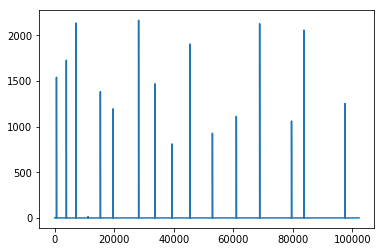

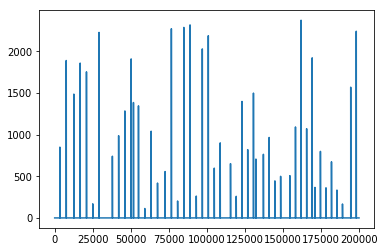

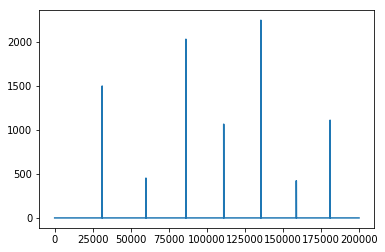

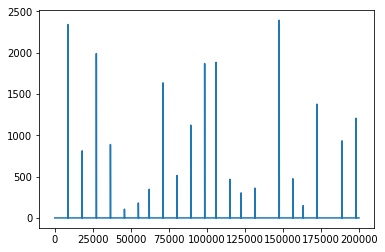

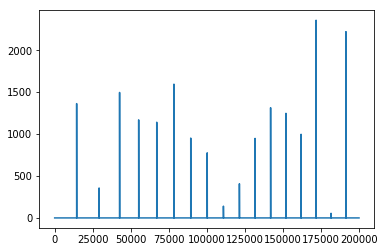

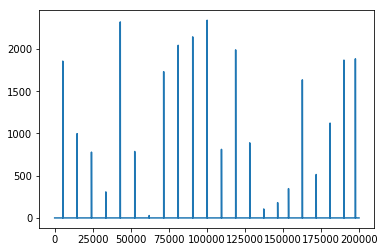

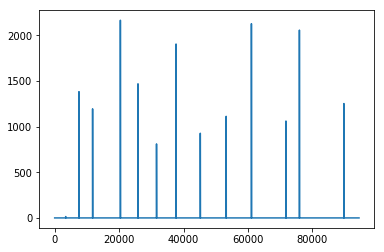

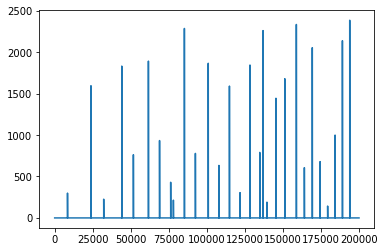

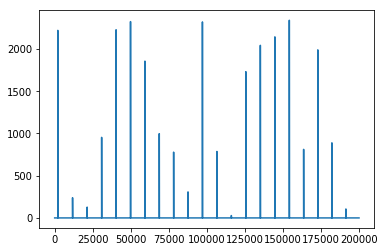

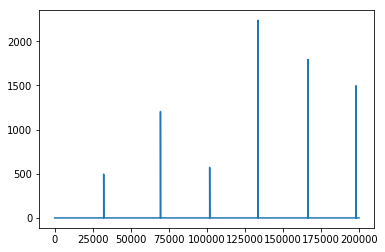

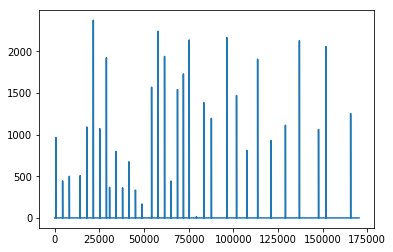

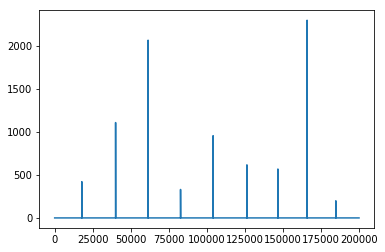

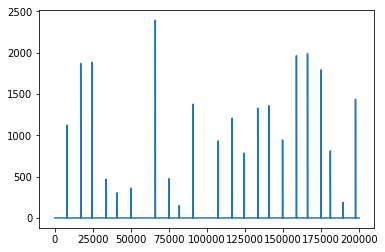

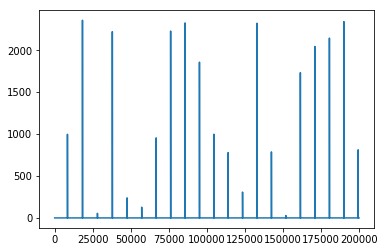

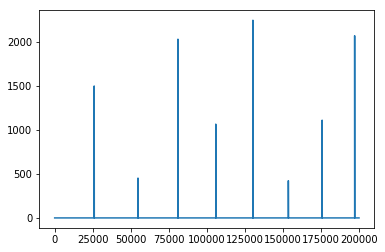

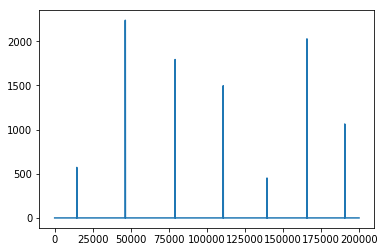

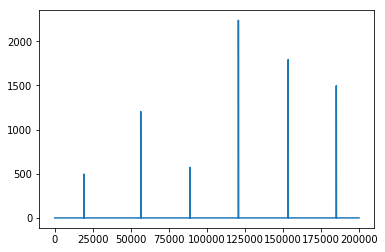

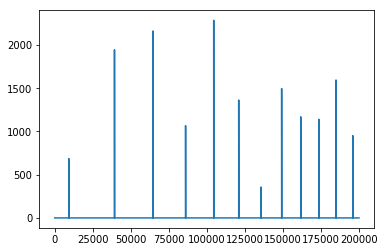

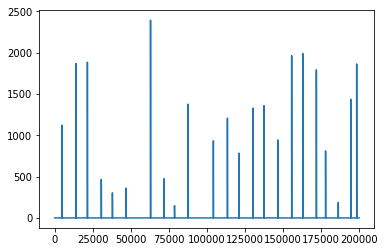

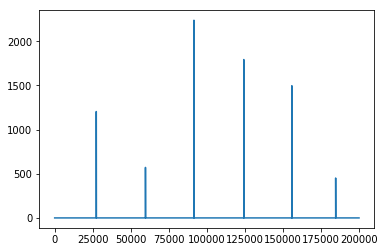

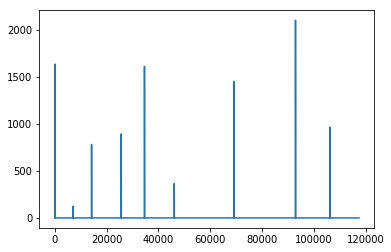

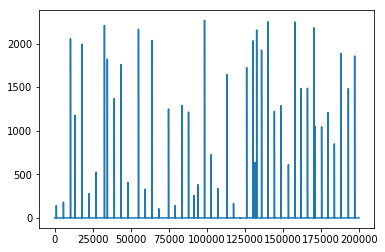

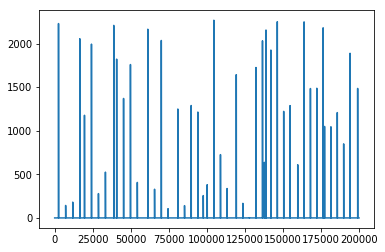

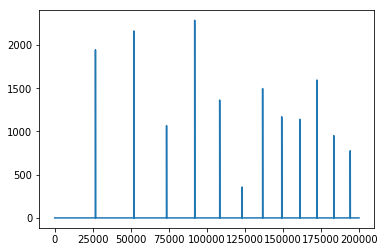

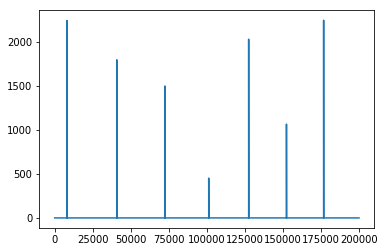

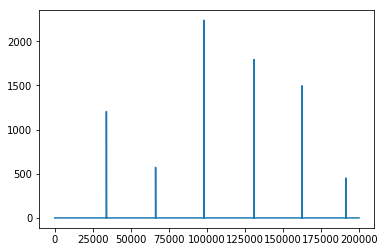

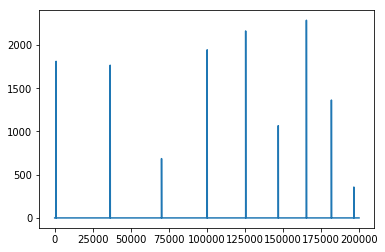

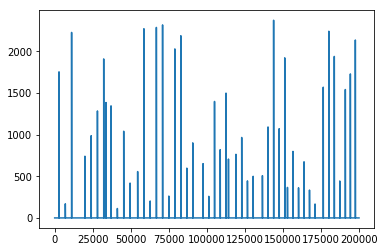

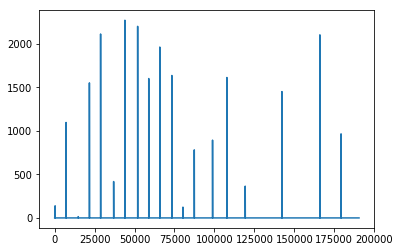

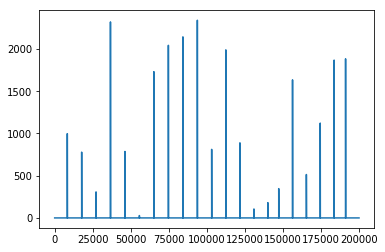

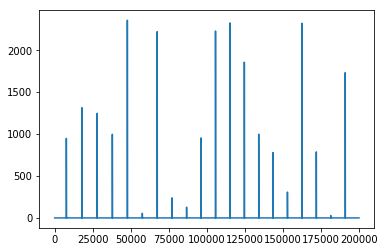

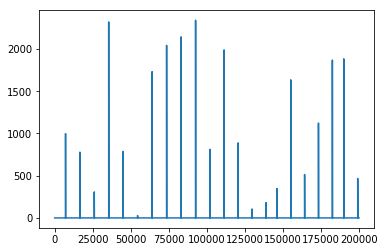

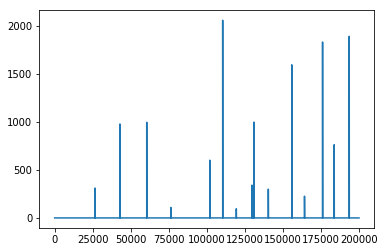

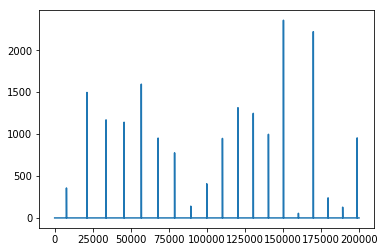

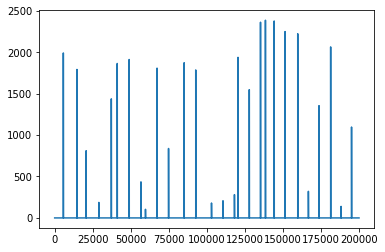

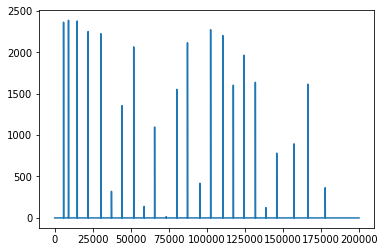

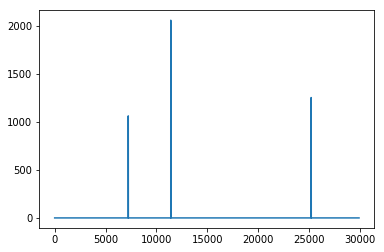

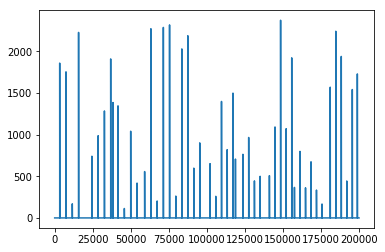

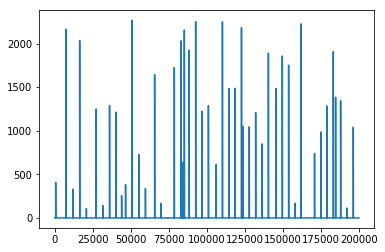

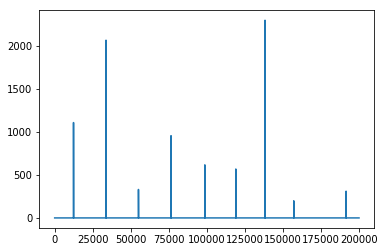

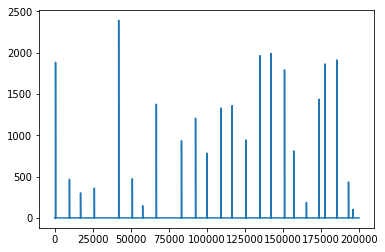

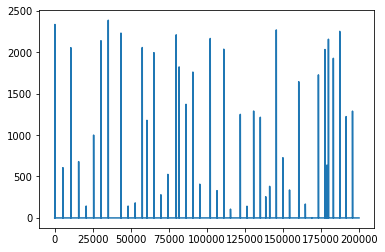

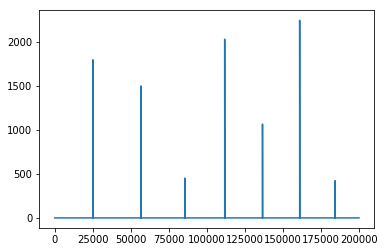

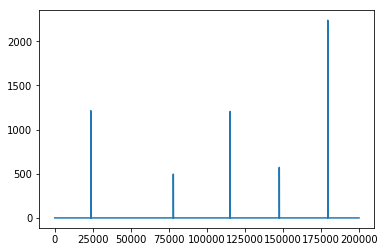

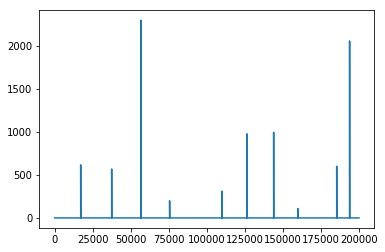

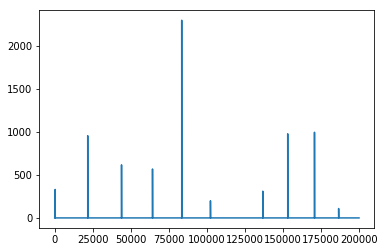

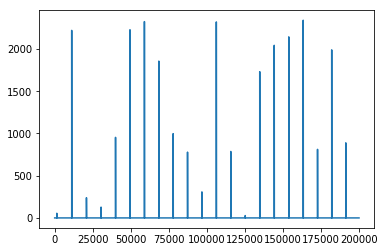

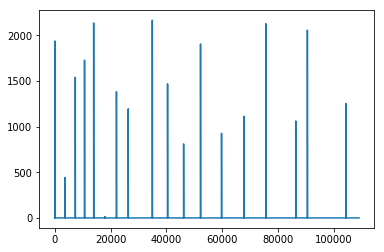

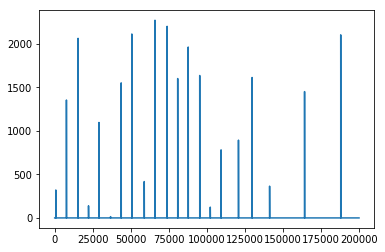

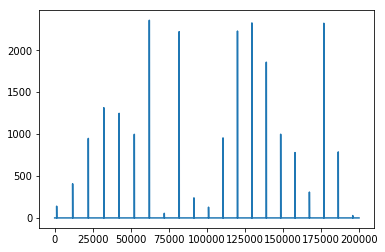

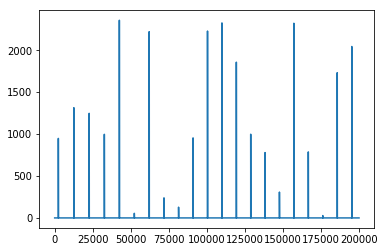

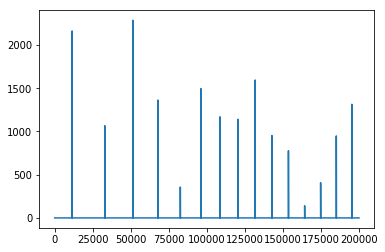

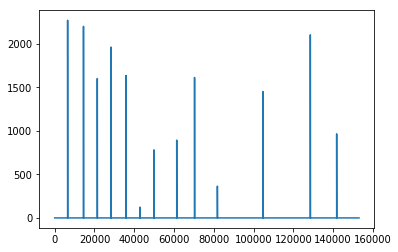

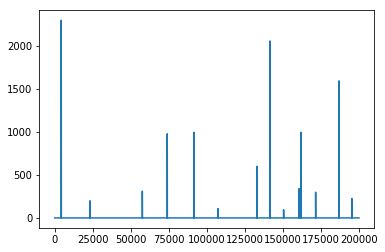

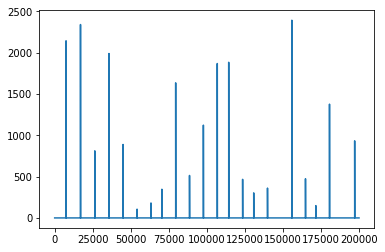

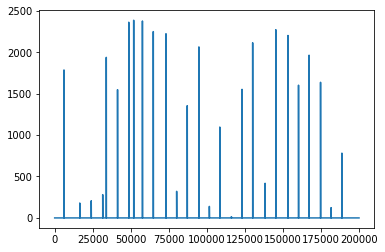

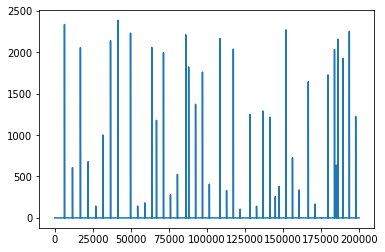

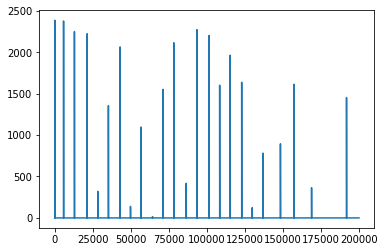

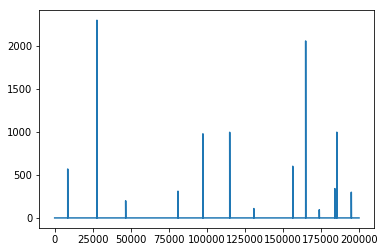

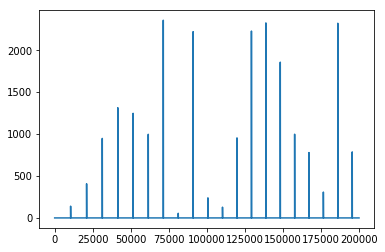

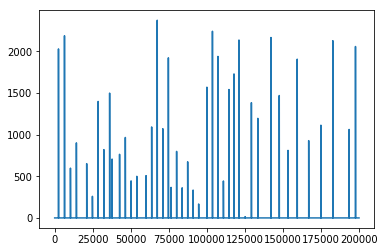

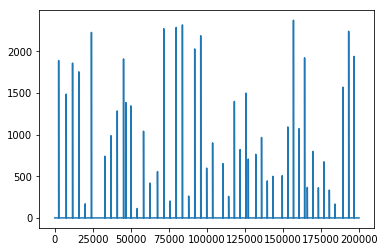

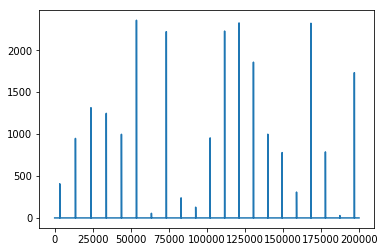

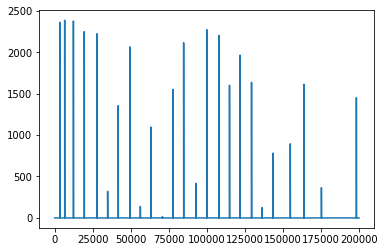

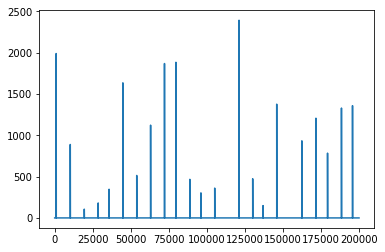

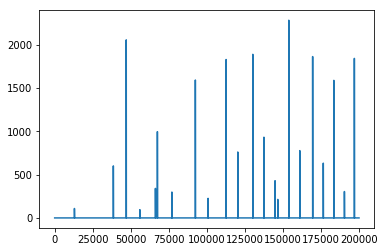

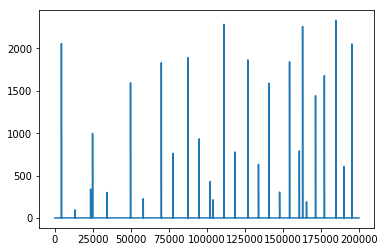

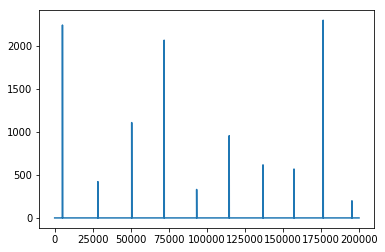

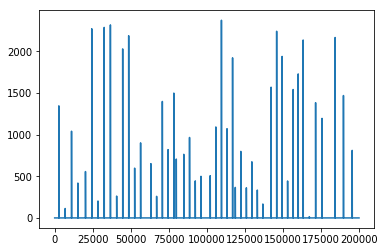

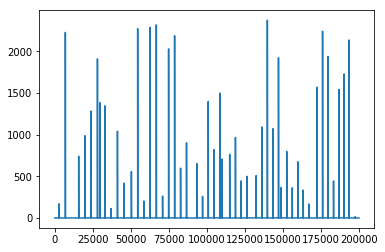

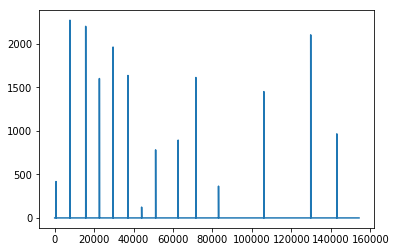

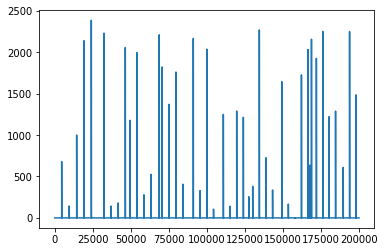

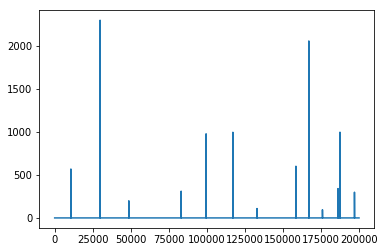

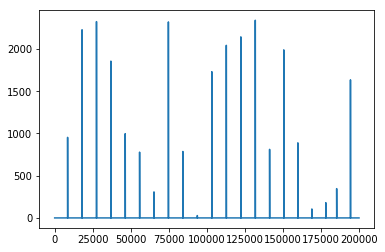

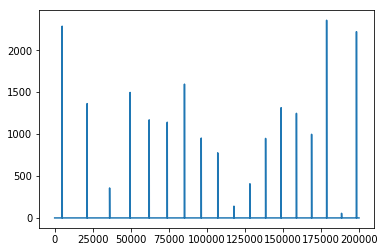

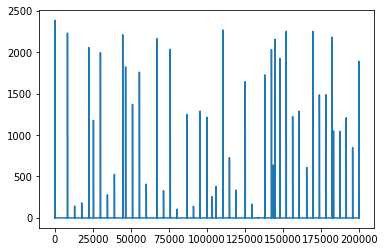

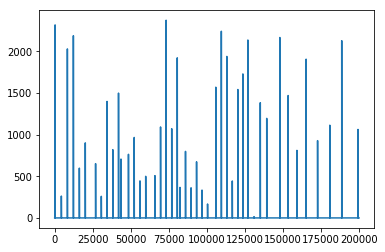

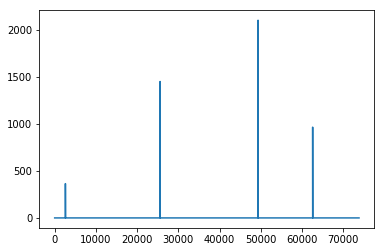

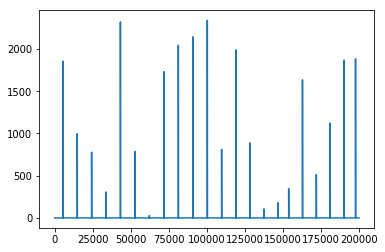

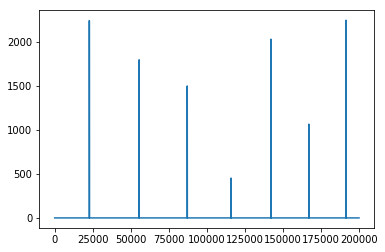

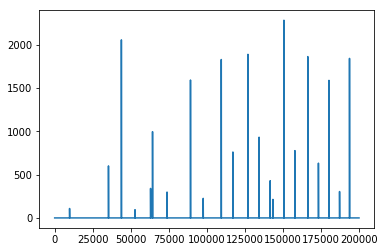

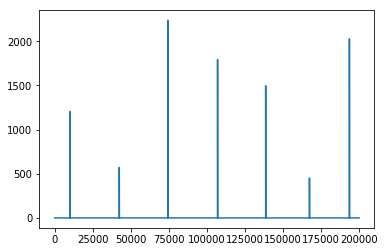

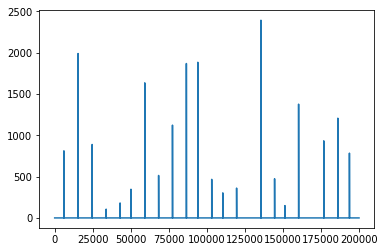

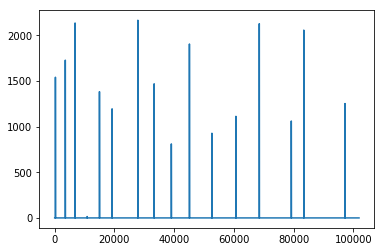

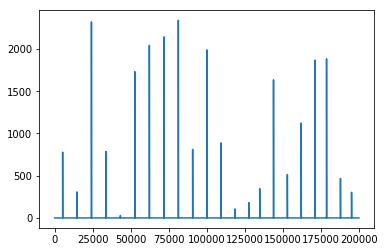

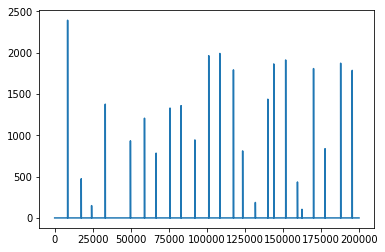

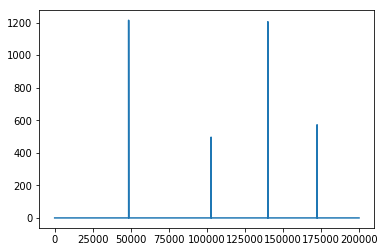

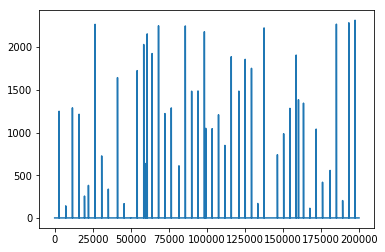

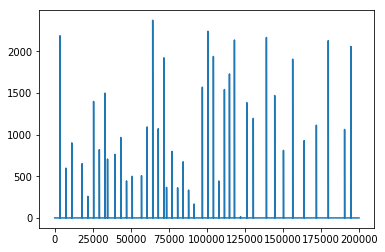

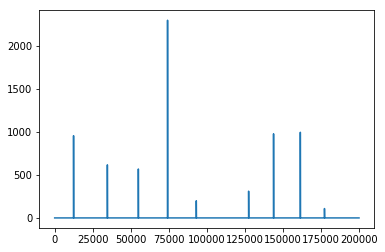

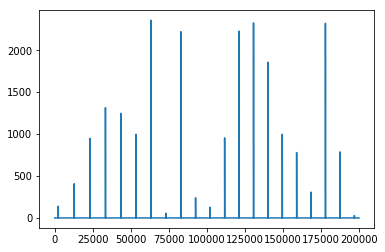

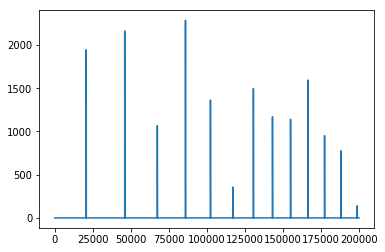

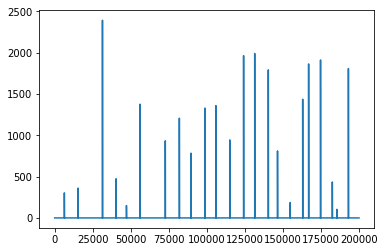

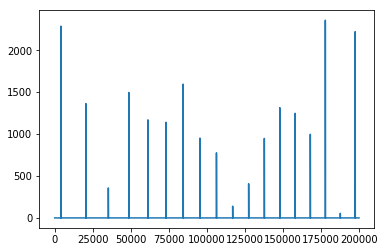

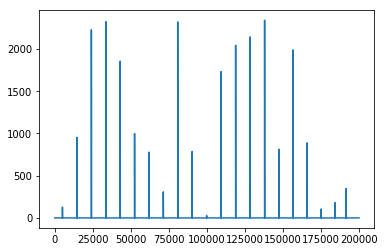

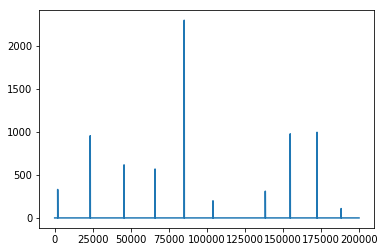

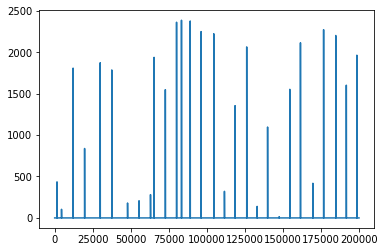

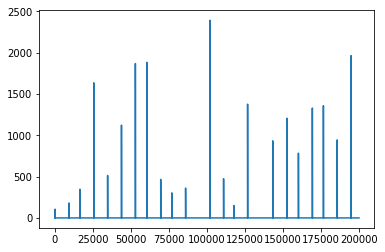

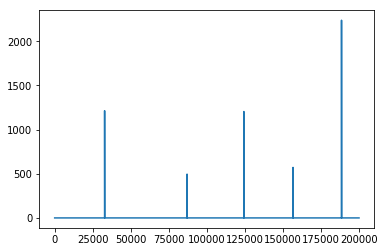

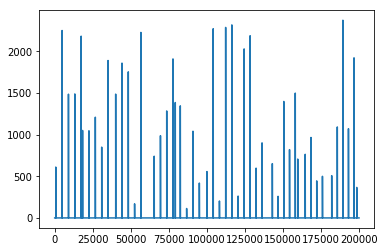

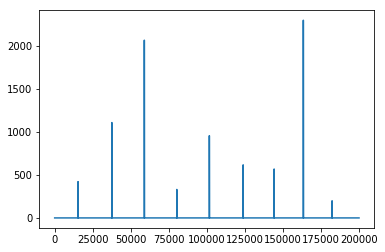

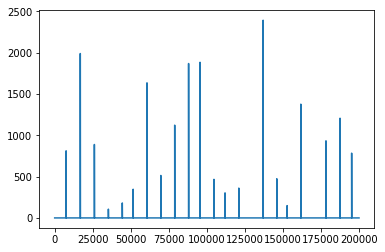

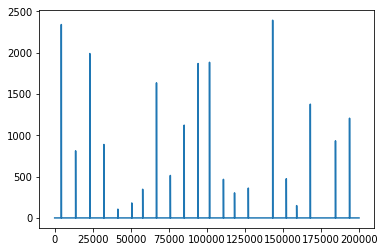

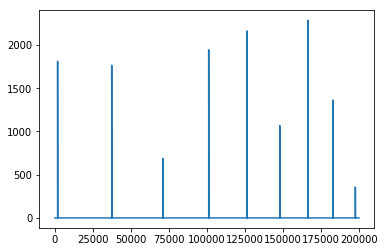

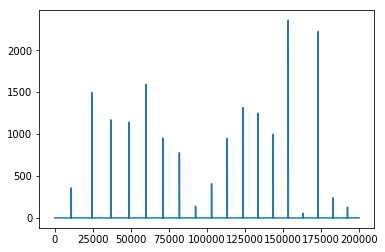

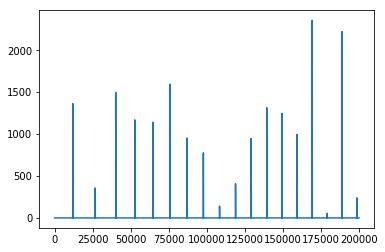

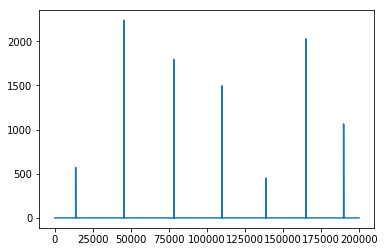

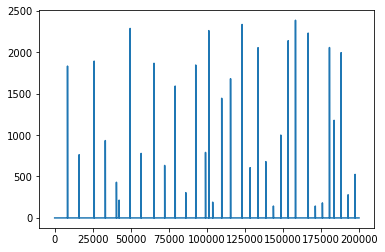

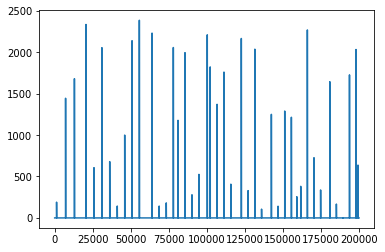

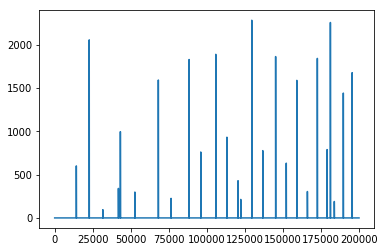

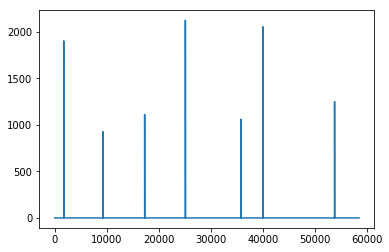

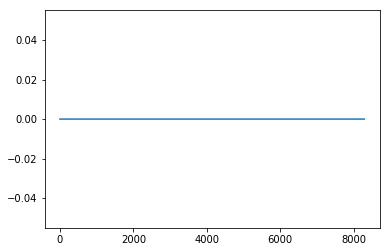

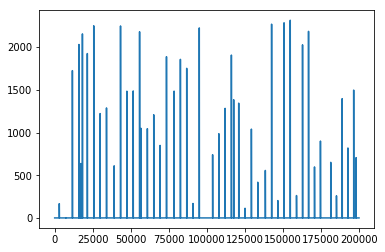

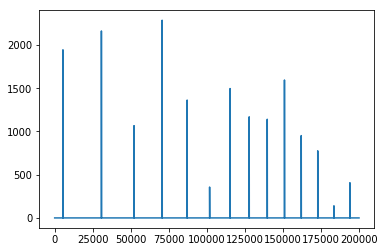

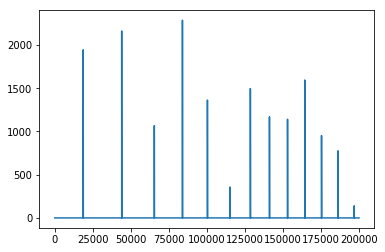

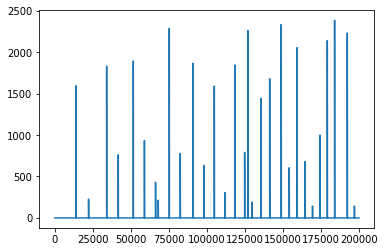

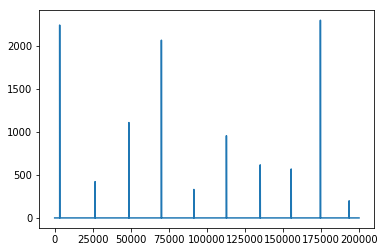

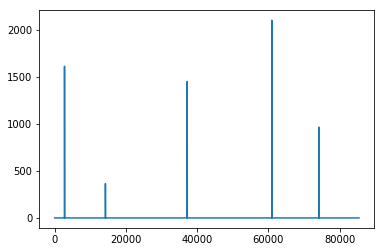

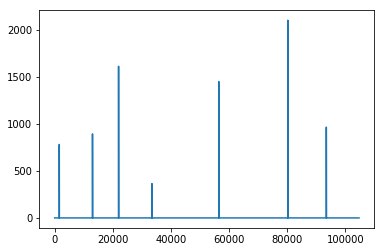

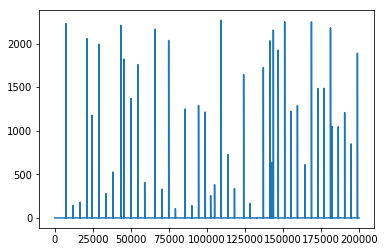

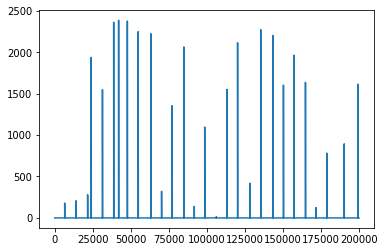

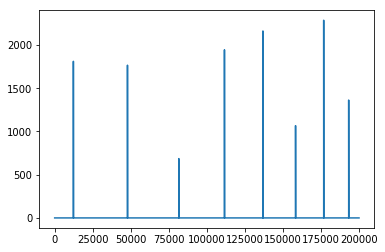

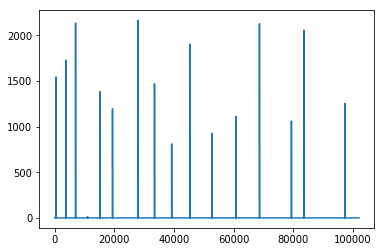

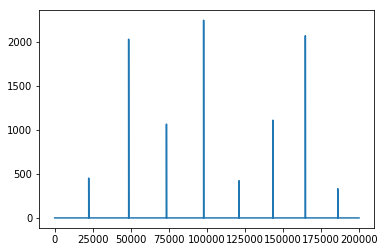

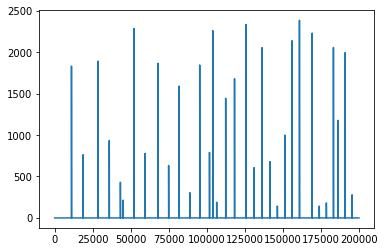

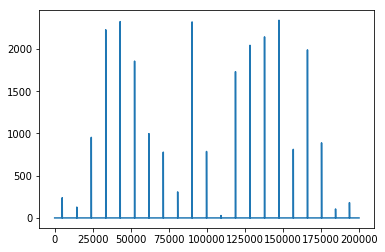

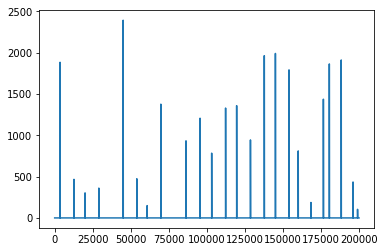

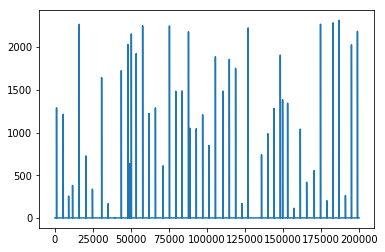

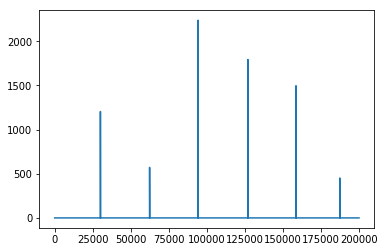

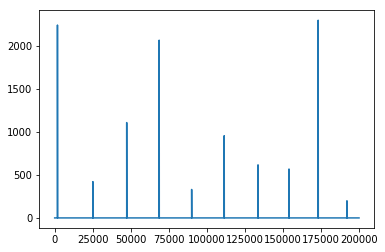

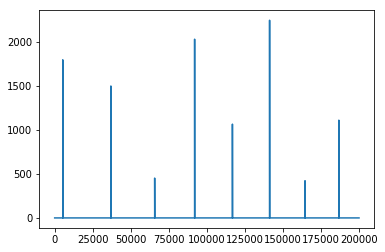

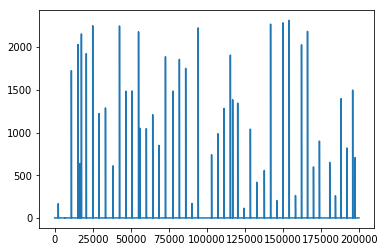

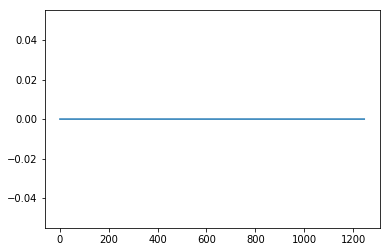

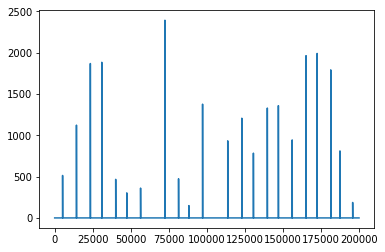

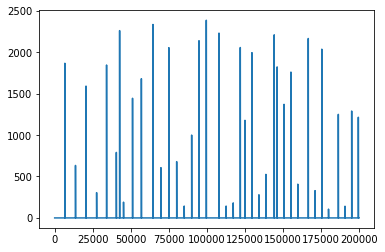

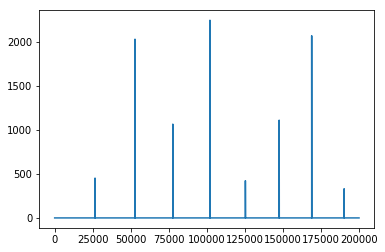

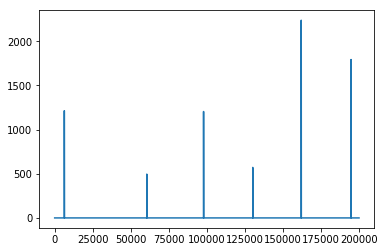

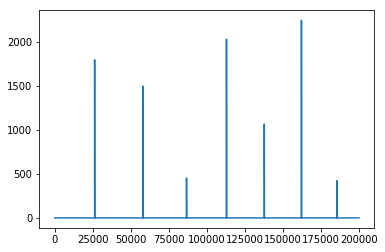

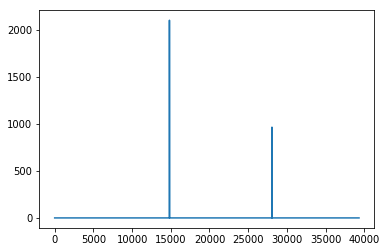

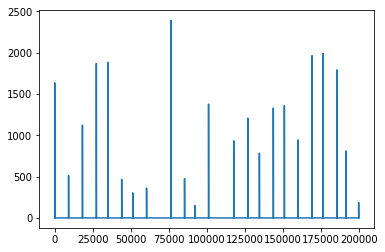

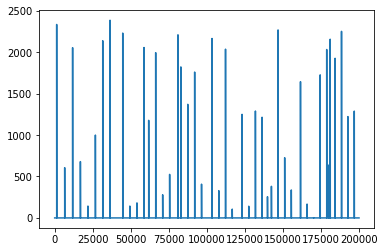

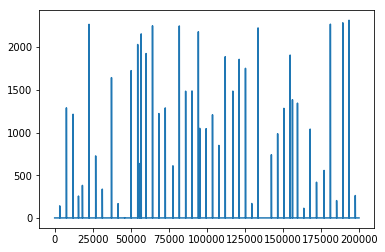

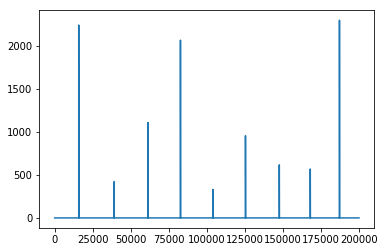

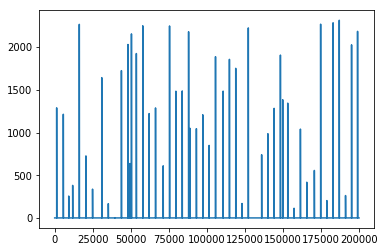

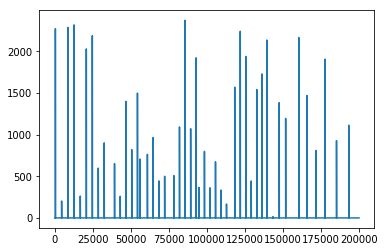

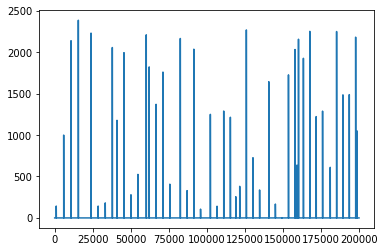

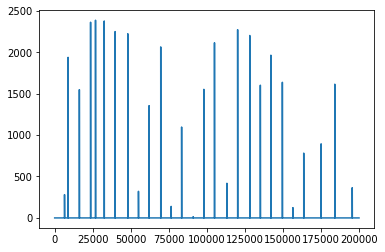

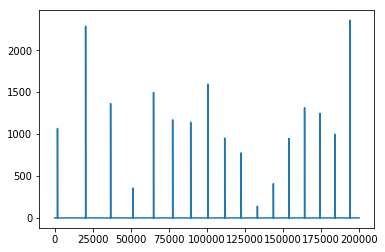

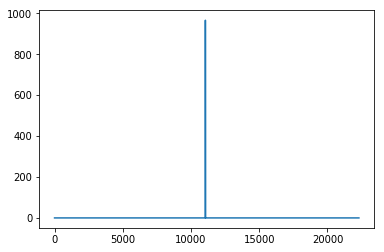

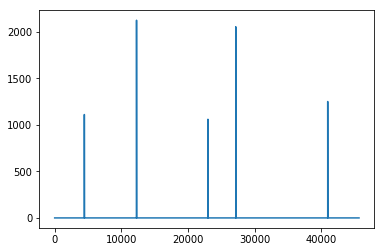

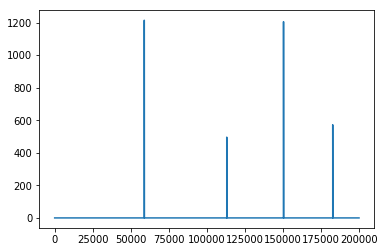

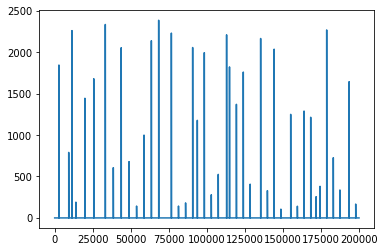

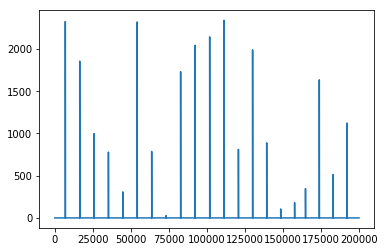

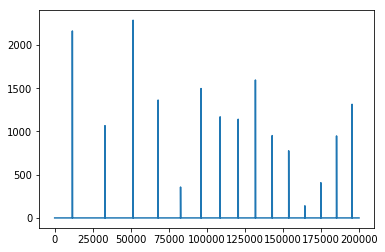

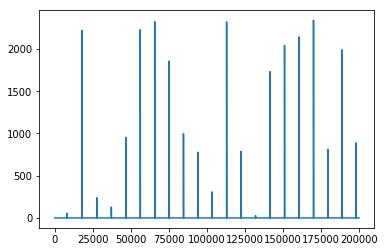

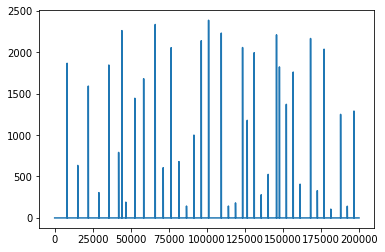

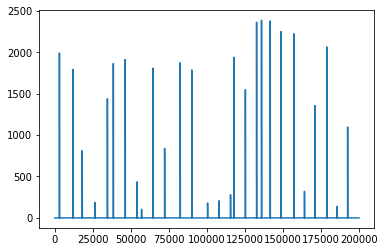

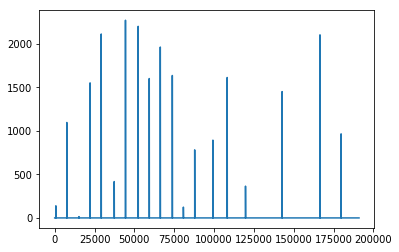

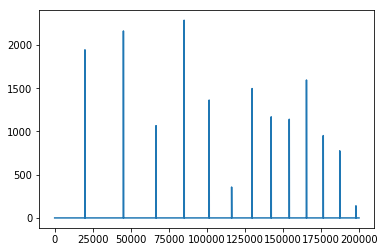

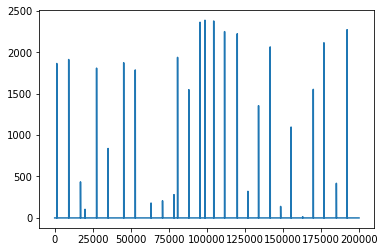

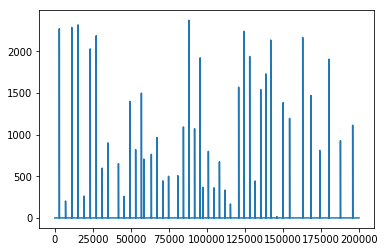

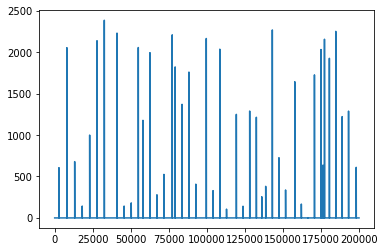

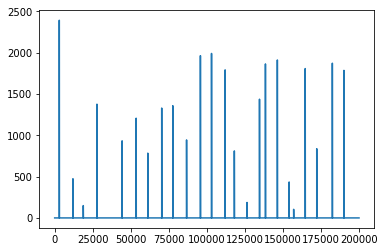

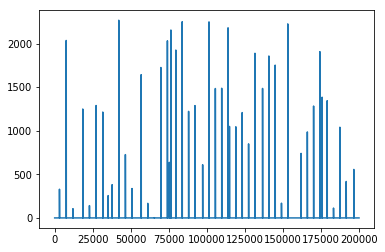

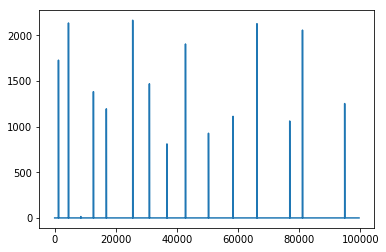

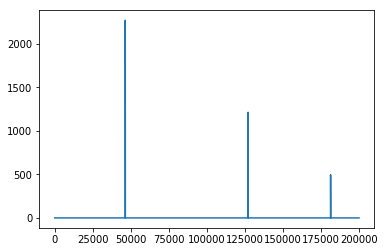

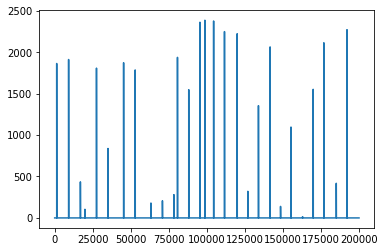

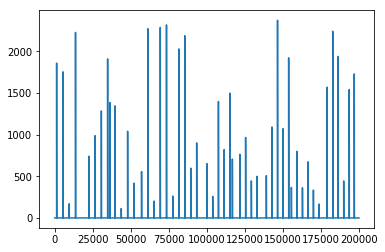

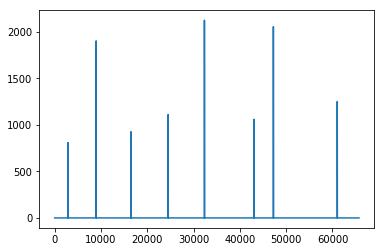

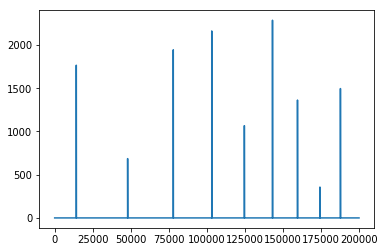

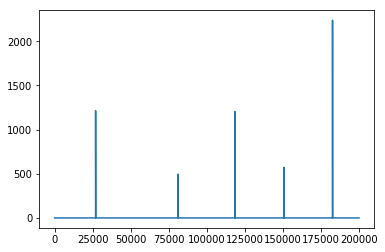

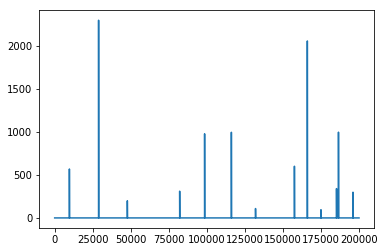

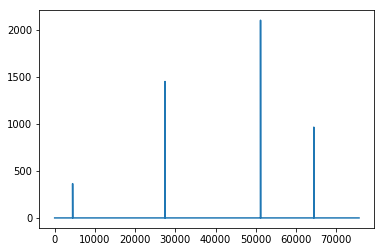

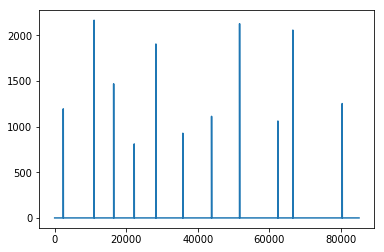

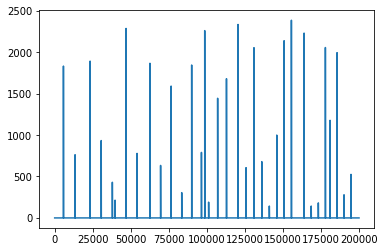

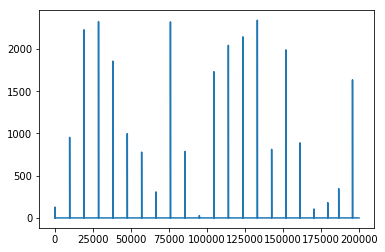

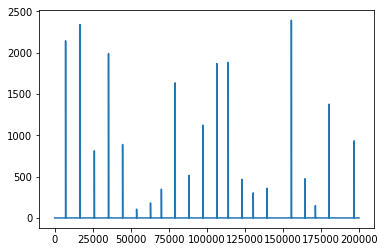

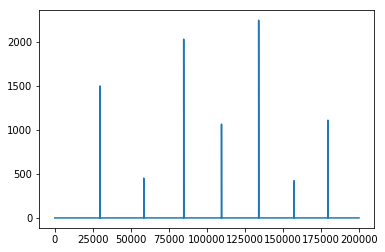

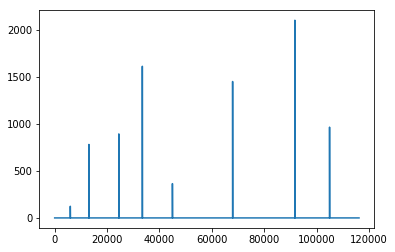

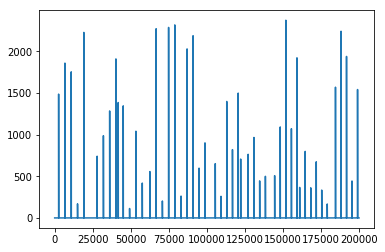

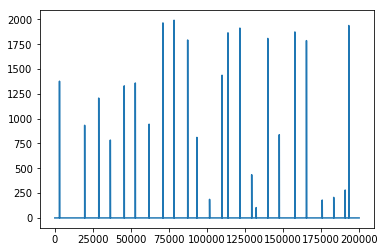

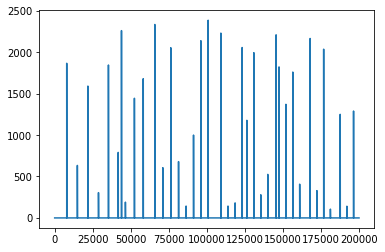

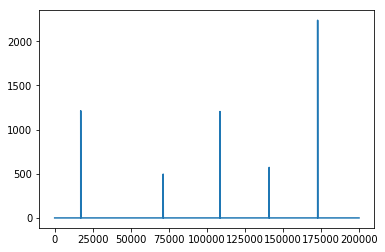

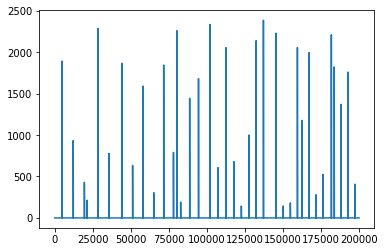

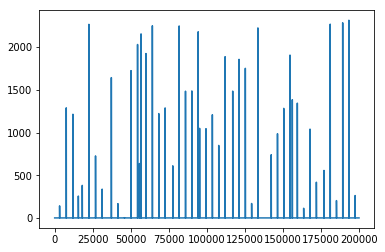

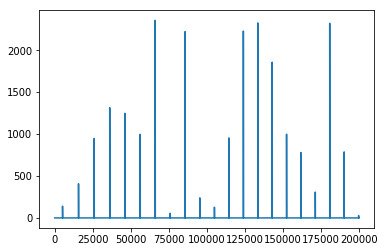

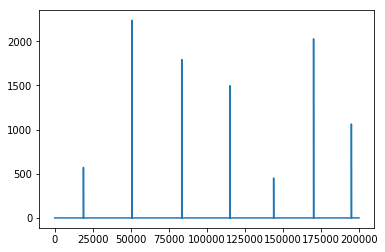

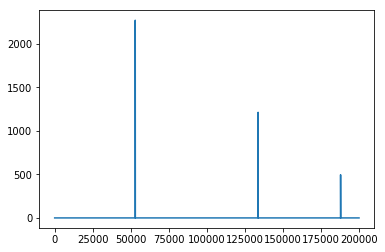

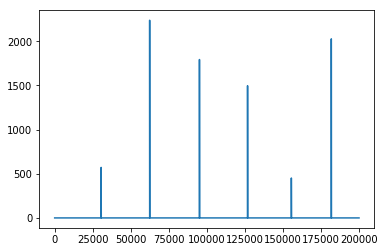

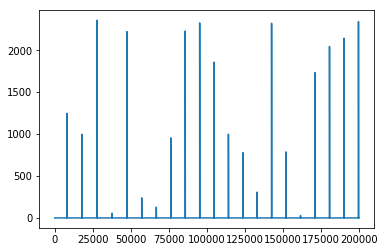

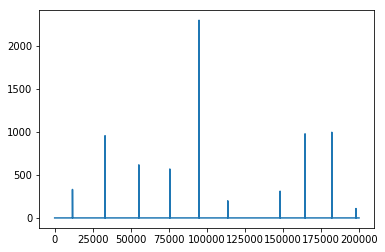

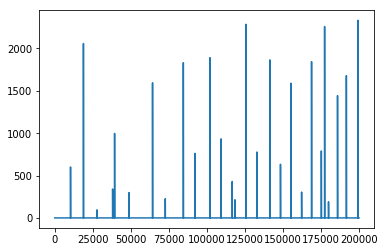

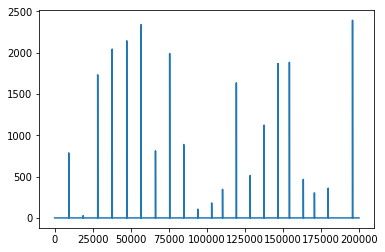

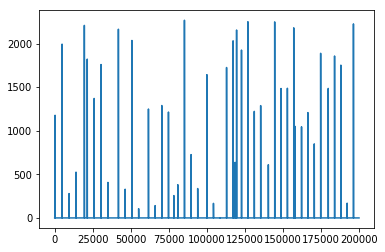

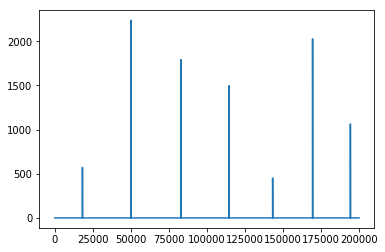

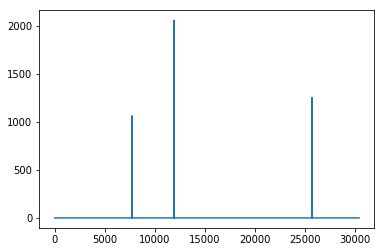

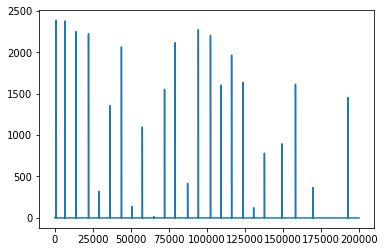

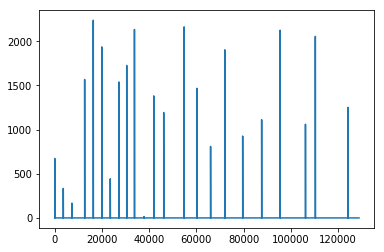

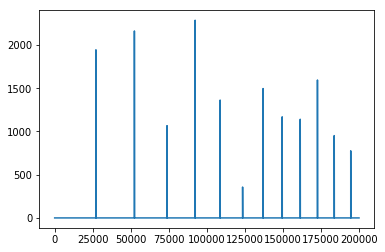

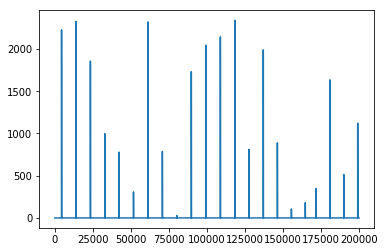

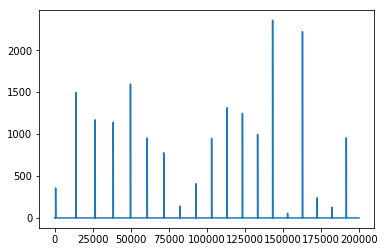

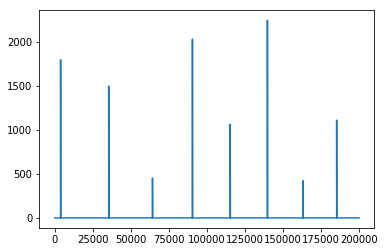

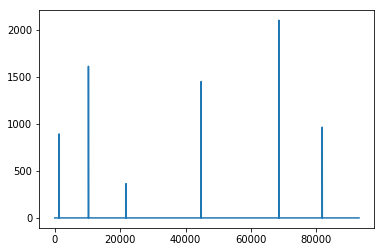

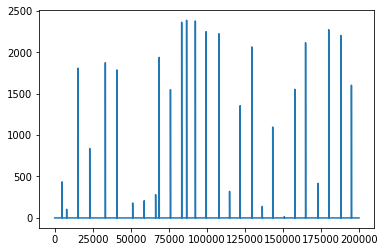

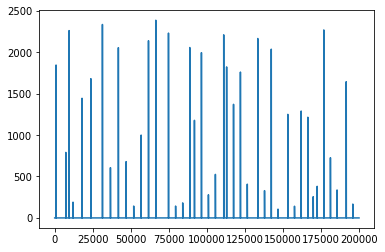

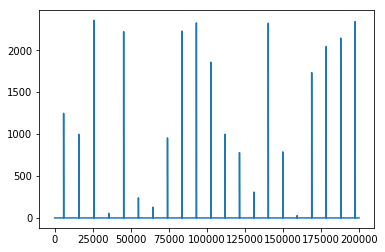

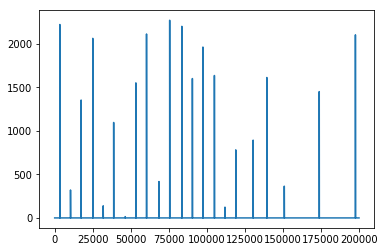

In [158]:
for roots, dirs, files in os.walk(r".\hechuan\生产线1\烧成煤立磨减速机1\测点0"):
    for i in files:
        #new_name = i.replace("EQPID001_MPID001", "MPID000").replace("测点1", "测点0")
        randkey = np.random.choice(keypd)
        randn = np.random.randint(250000, randkey.shape[0])
        wdata = randkey[randn:randn+200000]
        plt.close()
        plt.clf()
        plt.plot(wdata)
        plt.show()
        plt.close()
        np.savetxt(os.path.join(roots, i), wdata)
        #os.rename(os.path.join(roots, i), os.path.join(roots, new_name))

In [3]:
params_all = pd.read_excel("table.xlsx", sheet_name=None)

In [5]:
for keys, Sheet1 in params_all.items():
    print(keys, Sheet1.shape)

Sheet1 (50, 4)
Sheet2 (37, 4)
Sheet3 (54, 4)
Sheet4 (54, 4)
Sheet5 (68, 4)
Sheet6 (20, 4)
Sheet7 (47, 4)
Sheet8 (36, 4)


In [6]:
parts_id_list = []
writer = pd.ExcelWriter('all.xlsx')
for keys, Sheet1 in params_all.items():
    #Sheet1 = params_all["Sheet1"]
    temp = Sheet1.replace('[^a-zA-Z0-9]', '', regex=True).ffill()
    sheet1 = Sheet1.ffill().fillna(0)#[[u"零件参数", u"数值"]]
    col_name = sheet1.columns.tolist()
    col_name.insert(3, '参数')# 在 B 列前面插入
    sheet1 = sheet1.reindex(columns=col_name)
    sheet1[u'参数'] = temp[u'位置参数'].str.lower()+"_"+temp[u"部件参数"].str.lower()+"_"+temp[u"零件参数"].replace(["Spec", "Z", "EQS","D","d"], ["spec" ,"z", "eqs", "d1", "d2"])
    o_name = tuple(sheet1.columns.tolist())
    sheet1.columns = ['parts_position', 'parts_name', 'parts_params', 'parts_id', 'value']
    n_name = ('parts_position', 'parts_name', 'parts_params', 'parts_id', 'value')
    parts_id_list.append(sheet1["parts_id"].tolist())
    key = "equip_info_eqpid00"+keys[-1]
    print(key, Sheet1.shape)
    sheet1.to_excel(writer, index=False, sheet_name=key)
print(sheet1)
writer.save()

equip_info_eqpid001 (50, 4)
equip_info_eqpid002 (37, 4)
equip_info_eqpid003 (54, 4)
equip_info_eqpid004 (54, 4)
equip_info_eqpid005 (68, 4)
equip_info_eqpid006 (20, 4)
equip_info_eqpid007 (47, 4)
equip_info_eqpid008 (36, 4)
   parts_position  parts_name parts_params     parts_id  value
0         输入轴（IS）      轴承（B1）   轴承型号（Spec）   is_b1_spec    0.0
1         输入轴（IS）      轴承（B1）        外径（D）     is_b1_d1    0.0
2         输入轴（IS）      轴承（B1）        内径（d）     is_b1_d2    0.0
3         输入轴（IS）      轴承（B1）    滚动体的个数（n）      is_b1_n    0.0
4         输入轴（IS）      轴承（B1）       接触角（a）      is_b1_a    0.0
5         输入轴（IS）      轴承（B1）    滚动体的列数（c）      is_b1_c    0.0
6         输入轴（IS）      轴承（B2）   轴承型号（Spec）   is_b2_spec    0.0
7         输入轴（IS）      轴承（B2）        外径（D）     is_b2_d1    0.0
8         输入轴（IS）      轴承（B2）        内径（d）     is_b2_d2    0.0
9         输入轴（IS）      轴承（B2）    滚动体的个数（n）      is_b2_n    0.0
10        输入轴（IS）      轴承（B2）       接触角（a）      is_b2_a    0.0
11        输入轴（IS）   

In [57]:
for i in parts_id_list:
    print(len(i))

50
37
54
54
68
20
47
36


In [4]:
tablename = ["河南","山东", "山西", "上海", "福建"]

connection = pymysql.connect(host='localhost',
                             user='root',
                             password='li0123',
                             db='db',
                             charset='utf8',
                             )

In [6]:
cursor = connection.cursor()
       # for name in tablename:
        #checksql = '''DROP TABLE IF EXISTS {}'''.format(name)
        #cursor.execute(checksql)
for i in range(1, 9):
    ct = ["equip_id", "equip_name", "equip_cat_id", "line_id"] + parts_id_list[i-1]
    #print(ct)
    L = len(ct)
    print(L)
    ct.insert(0, "equip_info_eqpid00"+str(i))
    ct = tuple(ct)
    sql = ("CREATE TABLE `%s`("+ "`%s` float(0),"*(L-1) + "`%s` float(0))ENGINE=InnoDB DEFAULT CHARSET=utf8")%ct
    #print(sql)
    cursor.execute(sql)
#print(sql)
connection.commit()
connection.close()
print("Create tables done!")

NameError: name 'parts_id_list' is not defined

In [111]:
t1 = total[:5].copy()

In [115]:
cment = t1.loc[0].tolist()

In [116]:
tname = t1.columns.tolist()

In [ ]:
with connection.cursor() as cur:
    cur.execute("CREATE TABLE IF NOT EXISTS Writers(Id INT PRIMARY KEY AUTO_INCREMENT, Name VARCHAR(32))") 
    for i in tname[1:]:
        cur.execute("CREATE TABLE IF NOT EXISTS Writers(Id INT PRIMARY KEY AUTO_INCREMENT, Name VARCHAR(32))") 

In [196]:
ct = ("111", "222")
s = '''fadfa:%s, fdafdafs%s'''%ct
s
ct = []
for i in range(len(n_name)):
#     ct.append(tname[i])
#     ct.append(cment[i])
    ct.append(n_name[i])
    ct.append(o_name[i])
# ct = tuple(ct)
ct

['parts_position',
 '位置参数',
 'parts_name',
 '部件参数',
 'parts_params',
 '零件参数',
 'parts_id',
 '参数',
 'value',
 '数值']

In [145]:
cursor = connection.cursor()
       # for name in tablename:
        #checksql = '''DROP TABLE IF EXISTS {}'''.format(name)
        #cursor.execute(checksql)
s = "show tables"
cursor.execute(s)
sql = '''CREATE TABLE `cd_monitoring_task`(
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s',
             `%s` varchar(32)  COMMENT '%s'
         )ENGINE=InnoDB DEFAULT CHARSET=utf8'''%ct
print(sql)
cursor.execute(sql)
connection.commit()
connection.close()
print("Create tables done!")

CREATE TABLE `cd_monitoring_task`(
             `mp_id` varchar(32)  COMMENT '测点编号',
             `line_id` varchar(32)  COMMENT '生产线',
             `equip_name` varchar(32)  COMMENT '设备名称',
             `equip_cat_id` varchar(32)  COMMENT '设备种类编号',
             `equip_model` varchar(32)  COMMENT '设备型号',
             `equip_id` varchar(32)  COMMENT '设备实际编号',
             `mp_name` varchar(32)  COMMENT '测点名称',
             `equip_info_table` varchar(32)  COMMENT '设备参数表名',
             `equip_fcf_table` varchar(32)  COMMENT '设备故障特征频率表名',
             `cm_results_table` varchar(32)  COMMENT '监测结果表名',
             `keyp_path` varchar(32)  COMMENT '键相信号存储路径',
             `data_path` varchar(32)  COMMENT '振动信号存储路径',
             `samp_freq` varchar(32)  COMMENT '采样频率',
             `samp_time` varchar(32)  COMMENT '采样时间',
             `samp_interval` varchar(32)  COMMENT '采样间隔',
             `sensor_type` varchar(32)  COMMENT '传感器类型'
         )ENGINE=InnoDB DEFAULT CHARSET=utf8
Create table

In [197]:
cursor = connection.cursor()
       # for name in tablename:
        #checksql = '''DROP TABLE IF EXISTS {}'''.format(name)
        #cursor.execute(checksql)
for i in range(1, 9):
    t = ct
    print(len(t))
    ct.insert(0, "equip_info_eqpid000"+str(i))
    ct = tuple(ct)
    sql = '''CREATE TABLE `%s`(
                 `%s` varchar(32)  COMMENT '%s',
                 `%s` varchar(32)  COMMENT '%s',
                 `%s` varchar(32)  COMMENT '%s',
                 `%s` varchar(32)  COMMENT '%s',
                 `%s` varchar(32)  COMMENT '%s'
             )ENGINE=InnoDB DEFAULT CHARSET=utf8'''%ct
    print(type(t))
    ct = t[1:]
    cursor.execute(sql)
print(sql)
connection.commit()
connection.close()
print("Create tables done!")

10
<class 'list'>
10
<class 'list'>
10
<class 'list'>
10
<class 'list'>
10
<class 'list'>
10
<class 'list'>
10
<class 'list'>
10
<class 'list'>
CREATE TABLE `equip_info_eqpid008`(
                 `parts_position` varchar(32)  COMMENT '位置参数',
                 `parts_name` varchar(32)  COMMENT '部件参数',
                 `parts_params` varchar(32)  COMMENT '零件参数',
                 `parts_id` varchar(32)  COMMENT '参数',
                 `value` varchar(32)  COMMENT '数值'
             )ENGINE=InnoDB DEFAULT CHARSET=utf8
Create tables done!


In [150]:
t1cont.to_excel("t1.xlsx", index=False)

In [148]:
t1cont = total[1:5].copy()

In [151]:
total

,mp_id,line_id,equip_name,equip_cat_id,equip_model,equip_id,mp_name,equip_info_table,equip_fcf_table,cm_results_table,keyp_path,data_path,samp_freq,samp_time,samp_interval,sensor_type
0,测点编号,生产线,设备名称,设备种类编号,设备型号,设备实际编号,测点名称,设备参数表名,设备故障特征频率表名,监测结果表名,键相信号存储路径,振动信号存储路径,采样频率,采样时间,采样间隔,传感器类型
1,MPID001,生产线1,煤立磨减速机1,CATID001,JLP250G,EQPID001,测点1,equip_info_eqpid001,equip_fcf_catid001,resu_MPID001,F:\hechaun\生产线1\煤立磨减速机#1\测点0,F:\hechaun\生产线1\煤立磨减速机#1\测点1,12800,10,1,JLP250G
2,MPID002,生产线1,煤立磨减速机1,CATID001,JLP250G,EQPID001,测点2,equip_info_eqpid001,equip_fcf_catid001,resu_MPID002,F:\hechaun\生产线1\煤立磨减速机#1\测点0,F:\hechaun\生产线1\煤立磨减速机#1\测点2,12800,10,1,JLP250G
3,MPID003,生产线2,煤立磨减速机2,CATID001,JLP250G,EQPID002,测点1,equip_info_eqpid002,equip_fcf_catid002,resu_MPID003,F:\hechaun\生产线2\煤立磨减速机#2\测点0,F:\hechaun\生产线2\煤立磨减速机#2\测点1,12800,10,1,JLP250G
4,MPID004,生产线1,窑主减速机,CATID005,JH800C-SW306-31.5,EQPID003,测点1,equip_info_eqpid003,equip_fcf_catid003,resu_MPID004,NaN,F:\hechaun\生产线1\窑主减速机#1\测点1,12800,10,1,JLP250G
5,cd_equip_info(监测设备信息表),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,equip_id,line_id,equip_name,equip_cat_id,equip_model,mp_name,keyp_path,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,设备实际编号,生产线,设备名称,设备种类编号,设备型号,测点名称,键相信号存储路径,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,EQPID001,生产线1,煤立磨减速机1,1,JLP250G,测点0,F:\hechaun\生产线1\煤立磨减速机#1\测点0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 诊断报告的数据库生成

In [16]:
import random

indicator = [("MPID001", "1", "轴承|齿轮"),
             ("MPID002", "1", "轴承"),
             ("MPID002", "2", "齿轮"),
             ("MPID003", "2", "轴承|轮系")]

corpus = {"0" : (["萌生初期故障",
                 "存在早期故障"，
                 "具有早期微弱故障征兆"
                ],
                ["建议用户密切关注该测点的健康指标走势，及时掌握故障程度的发展", 
                 "建议用户着重留意该测点附近的零部件，必要时相应的信号进行分析，排除故障风险",
                 "建议用户重点关注该测点附近零部件的故障发展趋势，并定时排查",
                 "建议用户密切关注该测点的信号变化，通过指标变化关注早期故障的发展"
                ]),
          
          "1" : (["萌生初期故障",
                 "存在早期故障"，
                 "具有早期微弱故障征兆"
                ],
                ["建议用户密切关注该测点的健康指标走势，及时掌握故障程度的发展", 
                 "建议用户着重留意该测点附近的零部件，必要时相应的信号进行分析，排除故障风险",
                 "建议用户重点关注该测点附近零部件的故障发展趋势，并定时排查",
                 "建议用户密切关注该测点的信号变化，通过指标变化关注早期故障的发展"
                ]),
          
          "2" : (["存在故障",
                  "已经发生故障"，
                  "很大程度上出现故障"，
                  "出现故障的几率较大"，
                 ],
                 ["建议用户停机检查或者更换零部件",
                  "建议用户准备好备用零部件，对该测点附件零部件进行维修",
                  "故障有进一步扩展的趋势，建议用户尽快更换零部件",
                  "建议用户重点关注，最好停机检查进行维修"，
                  "建议用户定时进行现场勘查，密切关注设备运行状态，及时维修异常零部件"，
                ])
          }

def give_suggestion(data):
    # 判断测点状态编号
    if data[1] == "0":
        
    elif data[1] == "1":
        parts = "与".join(data[-1].split("|"))
        condition = corpus["1"]
        words = "测点%s当前处于%s状态，该测点附近的%s%s，%s"%(data[0], "预警", parts, random.choice(condition[0]), random.choice(condition[1]))
        print(words)
    elif data[1] == "2":
        parts = "与".join(data[-1].split("|"))
        condition = corpus["2"]
        words = "测点%s当前处于%s状态，该测点附近的%s%s，%s"%(data[0], "报警", parts, random.choice(condition[0]), random.choice(condition[1]))
        print(words)

if __name__ == "__main__":
    for i in indicator:
        give_suggestion(i)

In [93]:
connection = pymysql.connect(host="127.0.0.1",
                             user='root',
                             password='li0123',
                             db='db',
                             charset='utf8',
                             )

In [94]:
equip_id = "EQPID001"

In [97]:
cursor = connection.cursor()
column = ["cm_results_table", "mp_id", "equip_id", "line_id", "mp_name", "equip_name", "corresp_parts"]
table_name = "cd_monitoring_task"
mpid_sql = "select %s from %s where equip_id = '%s'"
fetched_data = {}
# for i in column:
print(mpid_sql%(",".join(column), table_name, equip_id))
cursor.execute(mpid_sql%(",".join(column), table_name, equip_id))
column_data = cursor.fetchall()
# fetched_data[i] = cursor.fetchall()

select cm_results_table,mp_id,equip_id,line_id,mp_name,equip_name from cd_monitoring_task where equip_id = 'EQPID001'


In [98]:
column_data

(('resu_mpid001', 'MPID001', 'EQPID001', '生产线1', '测点1', '烧成煤立磨减速机1'),
 ('resu_mpid002', 'MPID002', 'EQPID001', '生产线1', '测点2', '烧成煤立磨减速机1'))

In [10]:
alarm_col = ["Date", "ind_1_alarm", "ind_2_alarm", "ind_3_alarm", "ind_4_alarm", "ind_5_alarm", "ind_6_alarm"]
resu_sql = "select %s from %s where Date=(select max(Date) from %s)"%(",".join(alarm_col), column_data[0][-1], column_data[0][-1])

In [11]:
resu_sql

'select Date,ind_1_alarm,ind_2_alarm,ind_3_alarm,ind_4_alarm,ind_5_alarm,ind_6_alarm from resu_mpid001 where Date=(select max(Date) from resu_mpid001)'

In [90]:
alarm_data[0]

datetime.datetime(2017, 2, 10, 23, 5, 30)

In [104]:
max(list(range(6)))

5

In [99]:
mp_currentstate = {"0":"正常", "1":"预警", "2":"报警", "3":"停机"}
corresp_parts = '轴承'

In [106]:
alarm_data[0]+column_data[1]

[autoreload of ReportGenerator failed: Traceback (most recent call last):
  File "E:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "E:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 368, in superreload
    module = reload(module)
  File "E:\ProgramData\Anaconda3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "E:\ProgramData\Anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "F:\水泥厂\JDFFcementDATA\ReportGenerator.py", line 127

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'tuple'

In [86]:
def combiner(alarm_data):
    insert_d = tuple(list(alarm_data) + [0]*6)
    insert_d = [alarm_data[0]] + list(column_data[0][1:]) + [mp_currentstate[alarm_value], corresp_parts, mp_suggestions] 
    insert_sql = '''insert into report_result(fault_time, mp_id, equip_id, line_id, mp_name, equip_name, corresp_parts,mp_currentstate,\
                mp_suggestions,mp_result,equip_currentstate, equip_suggestions, equip_result)\
                values (str_to_date(\'%s\','%%Y-%%m-%%d %%H:%%i:%%S'), %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''%(
                insert_d)
    return insert_sql

In [87]:
combiner(alarm_data)

"insert into report_result(fault_time, equip_id, line_id, mp_name, equip_name, mp_id, mp_currentstate,                corresp_parts,mp_suggestions,mp_result,equip_currentstate, equip_suggestions, equip_result)                values (str_to_date('2017-02-10 23:05:30','%Y-%m-%d %H:%i:%S'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)"

In [12]:
cursor.execute(resu_sql)
alarm_data = cursor.fetchone()
alarm_data

(datetime.datetime(2017, 2, 10, 23, 5, 30), 0, 0, 0, 0, 0, 0)

In [82]:
insert_sql = '''insert into report_result(fault_time, equip_id, line_id, mp_name, equip_name, mp_id, mp_currentstate,\
                corresp_parts,mp_suggestions,mp_result,equip_currentstate, equip_suggestions, equip_result)\
                values (str_to_date(\'%s\','%%Y-%%m-%%d %%H:%%i:%%S'), %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'''

In [81]:
insert_sql

"insert into report_result(fault_time, equip_id, line_id, mp_name, equip_name, mp_id, mp_currentstate,                corresp_parts,mp_suggestions,mp_result,equip_currentstate, equip_suggestions, equip_result)                values (str_to_date('%s','%%Y-%%m-%%d %%H:%%i:%%S'), %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

In [88]:
cursor.execute(combiner(alarm_data))#test)

1

In [50]:
import datetime ,time
dt=datetime.datetime.now()

In [51]:
"corresp_parts","mp_suggestions","mp_result","equip_currentstate", "equip_suggestions", "equip_result"

datetime.datetime(2018, 10, 18, 18, 38, 18, 127156)

In [101]:
alarm_value = max(alarm_data[1:])

In [102]:
alarm_value

0

In [49]:
from ReportGenerator import ReportGenerator
%reload_ext autoreload
%autoreload 2

In [50]:
a = ReportGenerator()

In [51]:
a._connection()

In [14]:
mpid_info = a.get_mpid_info()

select cm_results_table,mp_id,equip_id,line_id,mp_name,equip_name,corresp_parts from cd_monitoring_task where equip_id = 'EQPID001'


In [20]:
mpid_info

(('MPID001', 'resu_mpid001'), ('MPID002', 'resu_mpid002'))

In [21]:
a.get_latest_alarm()

select mp_id,cm_results_table from cd_monitoring_task where equip_id = 'EQPID001'


0

In [53]:
a.run()

select cm_results_table,mp_id,equip_id,line_id,mp_name,equip_name,corresp_parts from cd_monitoring_task where equip_id = 'EQPID001'
False
False
False
insert into report_result(fault_time, mp_id, equip_id, line_id, mp_name, equip_name, corresp_parts, mp_currentstate,                    mp_suggestions,mp_result,equip_currentstate, equip_suggestions, equip_result)                    values (str_to_date('2018-10-19 15:28:38','%Y-%m-%d %H:%i:%S'), 'MPID001', 'EQPID001', '生产线1', '测点1', '烧成煤立磨减速机1', '轴承和齿轮', '预警', '萌生初期故障,建议用户密切关注该测点的信号变化，通过指标变化关注早期故障的发展', '2018-10-19 15:28:38烧成煤立磨减速机1测点1预警,萌生初期故障,建议用户密切关注该测点的信号变化，通过指标变化关注早期故障的发展', '报警', '建议用户重点关注，最好停机检查进行维修', '烧成煤立磨减速机1报警,建议用户重点关注，最好停机检查进行维修')


IntegrityError: (1062, "Duplicate entry 'EQPID001-MPID001' for key 'PRIMARY'")

In [89]:
connection.commit()
cursor.close()
connection.close()

In [31]:
a._connection()

AttributeError: 'ReportGenerator' object has no attribute '_connection'

In [48]:
a.connection_close()

In [ ]:
for i in range(len(mp_list)):
    for _, file_data in enumerate(os.listdir(mp_list[i][1])):
        file_path = (mp_list[i][1] + '\%s') %  file_data
        for _, csv_data in enumerate(os.listdir(file_path)):
            csv_path = (file_path + '\%s') %  csv_data